# 시작하기 전, 런타임 변경부터!

[런타임 > 런타임 유형 변경 > 하드웨어 가속기 > GPU > 저장]

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

# Python 기초: Numpy

## 기본 연산

* 앞으로 'array'라는 형태를 많이 사용하게 될 건데, array는 배열을 뜻합니다.
* 배열이 1차원이면 벡터(vector), 2차원이면 행렬(matrix)로 보면 됩니다!

In [3]:
import numpy as np

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [4]:
a = np.array([1, 2, 3])
b = np.array([[1, 2, 3],
              [4, 5, 6]])

In [5]:
a, a.shape

(array([1, 2, 3]), (3,))

In [6]:
b, b.shape

(array([[1, 2, 3],
        [4, 5, 6]]),
 (2, 3))

In [7]:
x = np.array([[1, 2],
              [3, 4]])
y = np.array([[5, 6],
              [7, 8]])

In [8]:
print(np.sum(x))
print(np.sum(x, axis=0)) # column
print(np.sum(x, axis=1)) # row

10
[4 6]
[3 7]


In [9]:
np.add(x, y)

array([[ 6,  8],
       [10, 12]])

In [10]:
np.subtract(x, y)

array([[-4, -4],
       [-4, -4]])

In [11]:
np.divide(x, y)

array([[0.2       , 0.33333333],
       [0.42857143, 0.5       ]])

In [12]:
# 제곱근
np.sqrt(x)

array([[1.        , 1.41421356],
       [1.73205081, 2.        ]])

## 두 행렬의 내적(행렬곱) & Broadcasting

* 행렬곱?

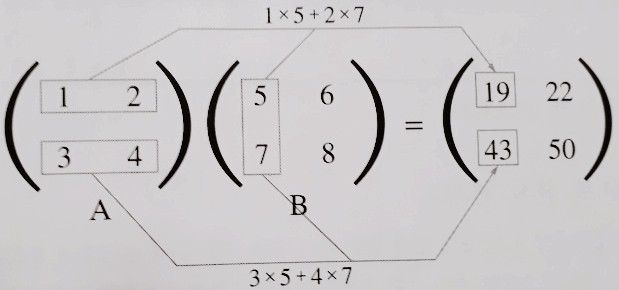

In [13]:
v.dot(w)
# np.dot(v, w) 도 같은 결과 도출함

NameError: name 'v' is not defined

In [ ]:
x.dot(v)

array([29, 67])

In [ ]:
''' 참고
x = [[1, 2]
     [3, 4]]
y = [[5, 6]
     [7, 8]]
'''

x.dot(y)

array([[19, 22],
       [43, 50]])

In [ ]:
# Broadcasting
a = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9],
              [10, 11, 12]])
b = np.array([1, 0, 1])

In [ ]:
a + b

array([[ 2,  2,  4],
       [ 5,  5,  7],
       [ 8,  8, 10],
       [11, 11, 13]])

# Data Load & Data EDA

## Problem Definition

국내에는 도시 별로 다양한 종류의 랜드마크(Landmark)가 있으며, 랜드마크를 통한 관광 수입은 연간 수조원에 이를 만큼 국가 경제에 막대한 영향을 끼칩니다.

우리는 이 중 서울시의 랜드마크 10곳에 대한 이미지를 보고, **이 이미지가 어떤 랜드마크에 대한 이미지인지 분류**하는 문제를 풀 것입니다.



```
* 훈련 데이터(Train data): X_train, y_train
* 평가 데이터(Test data): X_val, y_val
```








In [ ]:
# from google.colab import drive
# drive.mount('./MyDrive')

Mounted at ./MyDrive


***파일 위치 확인***

```
폴더_A
  ㄴ 폴더_B
    ㄴ 이미지_C.png
```
* 위 경우, 파일_C의 경로는 '/폴더_A/폴더_B/파일_C.png' 가 됩니다.


In [ ]:
# 현재 파일 위치 확인
! pwd

/content


In [ ]:
X_TRAIN_PATH = '/content/drive/MyDrive/dd/X_train.npy'
X_TEST_PATH = '/content/drive/MyDrive/dd/X_test.npy'
Y_TRAIN_PATH = '/content/drive/MyDrive/dd/y_train.npy'
Y_TEST_PATH = '/content/drive/MyDrive/dd/y_test.npy'

### EDA(Exploratory Data Analysis)

```
탐색적 데이터 분석. 즉, 내가 사용할 데이터가 어떻게 생겼는지 씹고, 뜯고, 분석하는 과정!
```

* 이 문제를 풀기 위해 여러분이 궁금한 게 뭔가요?
> * 실제로 데이터가 어떻게 생겼나?
> * 내가 궁금한 것? 알고 싶은 것?
> * 주어진 데이터 타입은 어떤 것?
> * ...



In [ ]:
import numpy as np

X_train = np.load(X_TRAIN_PATH)
y_train = np.load(Y_TRAIN_PATH)
X_test = np.load(X_TEST_PATH)
y_test = np.load(Y_TEST_PATH)

print('Shape of X_train: ', X_train.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of X_val: ', X_test.shape)
print('Shape of y_val: ', y_test.shape)

Shape of X_train:  (1257, 256, 256, 3)
Shape of y_train:  (1257,)
Shape of X_val:  (310, 256, 256, 3)
Shape of y_val:  (310,)


In [ ]:
import pickle

with open('/content/drive/MyDrive/dd/label_info.pkl', 'rb') as f:
	label_info = pickle.load(f)

In [ ]:
label_info

{0: '전차381호', 1: 'IFC몰', 2: 'JW메리어트동대문스퀘어서울', 3: '중계3동우체국', 4: 'JW메리어트호텔서울'}

* 우리가 갖고 있는 데이터가 어떤 형태였나요?

아래 사진의 Class 명은 [전차381호] 입니다.


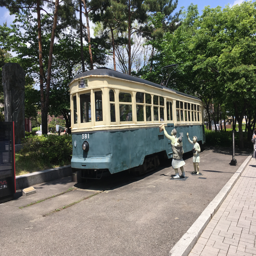

In [ ]:
from IPython.display import Image, display
# from tensorflow.keras.preprocessing.image import load_img
import PIL

idx = 0
image = PIL.Image.fromarray(X_train[idx])
print(f'아래 사진의 Class 명은 [{label_info[y_train[idx]]}] 입니다.')
image.show()

In [ ]:
import pandas as pd

y_train_df = pd.DataFrame(y_train).reset_index()
y_train_df.columns = ['N번째 Train 데이터', 'Label']
y_train_df['Class 한글명'] = [label_info[i] for i in y_train]
y_train_df

,N번째 Train 데이터,Label,Class 한글명
0,0,0,전차381호
1,1,0,전차381호
2,2,0,전차381호
3,3,0,전차381호
4,4,0,전차381호
...,...,...,...
1252,1252,4,JW메리어트호텔서울
1253,1253,4,JW메리어트호텔서울
1254,1254,4,JW메리어트호텔서울
1255,1255,4,JW메리어트호텔서울


In [ ]:
print(f'우리가 분류해야 하는 Class는 총 {len(set(y_train))}개 입니다.')
print(f'Class는 {set(y_train)} 입니다.')

우리가 분류해야 하는 Class는 총 5개 입니다.
Class는 {0, 1, 2, 3, 4} 입니다.


In [ ]:
# Class 별 데이터 개수 확인
y_train_df.value_counts('Label')

Label
0    280
1    280
2    271
3    214
4    212
dtype: int64

* 우리가 가진 데이터는...
> * 모두 256 x 256 크기로 조정되어 있다.
> * 컬러(RGB) 이미지로 되어 있다.
> * 분류해야 하는 Class는 총 10개이다.
> * 데이터가 가장 많은 Class와 데이터가 가장 적은 Class의 데이터 차이는 약 100개이다.

# Deep Learning Frameworks

## Framework?
* 내가 원하는 코드를 작성하기 위해 활용하는 도구

## Tensorflow
* 구글에서 개발한 딥러닝 프레임워크
* Low Level을 코딩해야하는 경우가 많아서, 초보자가 쉽게 접근하기 어렵다.
* 프레임워크 중 연산 속도가 가장 빠르다.

## Keras
* 텐서플로우의 고난이도 작업을 간소화하기 위해 개발된 프레임워크
* 쉽고 빠르게 모델을 빌드할 수 있다는 장점이 있다.
* Backend언어가 일반적인 파이썬이 아니기 때문에, 만약 케라스 능숙자가 아니라면 디버깅이 어려울 수 있다.
* 그러나, 텐서플로우 기반으로 개발과 배포시에 안정적이다.

## Pytorch
* Facebook에서 개발한 딥러닝 프레임워크.
* 파이썬 언어와 매우 잘 맞는 개발 방식으로, 최근 성장세를 보인다.
* 텐서플로우보다 비교적 느리며, 안정성이 떨어지는 단점이 있다.

## 어떤 프레임워크/라이브러리를 선택하여야 할까?
1. 최근 텐서플로우를 직접 활용하기 보다는 케라스 엔진과 함께 사용하는 경향성이 커지고 있기에, 파이토치와 케라스 중 고민하는 것이 좋다.
2. 케라스와 텐서플로우 모두 비슷한 코드 구성을 보이고 있으며, 이제는 프레임워크가 기능적으로 많이 통일화되어 두 프레임워크 중 하나에 능숙해진다면 어떤 것을 사용하더라도 동일한 개발이 가능하다.
3. 케라스는 강력한 API Docs와 공식 예제를 보유하고 있으며, 파이토치는 쉬운 장점을 살려 다양한 유저 예제를 보유하고 있다.

## 본 수업에서는...
* Tensorflow/Keras를 통해 수업을 진행할 계획입니다.
* 텐서플로우의 기초와, 딥러닝 방법을 케라스를 통해 학습합니다.


### Tensorflow
* [TF Document](https://www.tensorflow.org/api_docs/python/tf?hl=ko)
* [Keras Document](https://keras.io/)

In [ ]:
import tensorflow as tf

print(tf.__version__)
print(tf.keras.__version__)

2.12.0
2.12.0


## Basic Keras: Layers
* [Layer Document1 - Keras](https://keras.io/api/layers/)
* [Layer Document2 - TF](https://www.tensorflow.org/api_docs/python/tf/keras/layers)

In [ ]:
# Convolution Layer Example
conv1 = tf.keras.layers.Conv2D(
    filters = 64,
    kernel_size = (3, 3),
)
# Filter = 필터 개수 # Kernel_size = 컨볼루션 연산시 사용할 필터 크기

In [ ]:
dense1 = tf.keras.layers.Dense(
    units = 4,
    activation = 'softmax',
)
# units = 유닛 개수, activation= 활성화 함수

In [ ]:
# Custom Layer
class Linear(tf.keras.layers.Layer):
    """y = w.x + b"""
    def __init__(self, units=32, input_dim=32):
        super(Linear, self).__init__()
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(
            initial_value=w_init(shape=(input_dim, units), dtype="float32"),
            trainable=True,
        )
        b_init = tf.zeros_initializer()
        self.b = tf.Variable(
            initial_value=b_init(shape=(units,), dtype="float32"), trainable=True
        )

    def call(self, inputs):
        # Code HERE ( Linear Model )
        return tf.matmul(inputs, self.w) + self.b

linear_layer = Linear(units=4, input_dim=2)

## 다양한 CNN 모델들
* [https://keras.io/api/applications/](https://keras.io/api/applications/)

### VGG Net

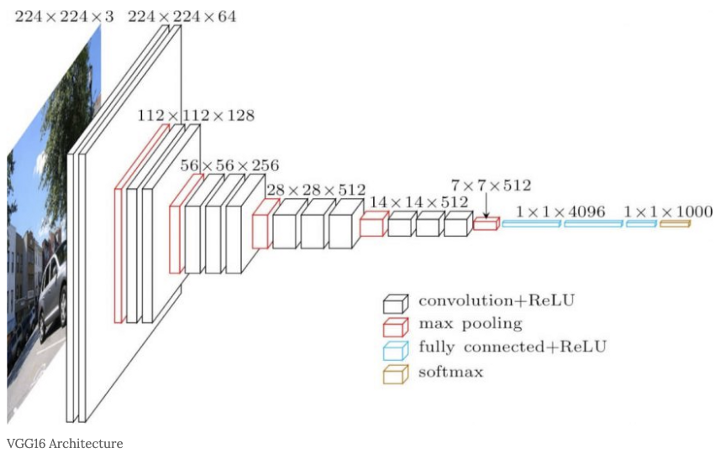

In [ ]:
OriginalVGG = tf.keras.applications.VGG16(
                    include_top=True,
                    weights="imagenet", # Pre-training이 가능함.
                    input_shape=(224,224,3),
                    pooling=None,
                    classes=1000,
                    classifier_activation="softmax",
                )

553467096/553467096 [==============================] - 29s 0us/step


In [ ]:
OriginalVGG.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
VGGExtractor = tf.keras.applications.VGG16(
                    include_top=False,
                    weights="imagenet", # Pre-training이 가능함.
                    input_shape=(256,256,3),
                )

In [ ]:
VGGExtractor.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
for layer in VGGExtractor.layers:
    print(layer.name, layer.trainable)

input_1 True
block1_conv1 True
block1_conv2 True
block1_pool True
block2_conv1 True
block2_conv2 True
block2_pool True
block3_conv1 True
block3_conv2 True
block3_conv3 True
block3_pool True
block4_conv1 True
block4_conv2 True
block4_conv3 True
block4_pool True
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [ ]:
for layer in VGGExtractor.layers[:-4]: # 마지막 한개의 컨볼루션 블럭만 훈련하고 나머지는 얼리기
    layer.trainable = False

In [ ]:
for layer in VGGExtractor.layers:
    print(layer.name, layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


## 자신만의 FC Layer 정의하기

In [ ]:
inp = VGGExtractor.input
x = VGGExtractor.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(64, activation="relu")(x)
out = tf.keras.layers.Dense(10, activation="softmax")(x)

model = tf.keras.Model(inp, out)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train_, y_val_ = train_test_split(X_train, y_train, train_size=0.8, \
                                                  random_state=3407, shuffle=False)

In [ ]:
model.fit(x_train, y_train_,
          batch_size=4,
          epochs=10,
          validation_data=(x_val, y_val_),
          verbose=2) # verbose: 학습 진행 상황에 대한 출력 여부 지정. 0(silent), 1(progress bar), 2(one line per epoch)

Epoch 1/10
252/252 - 27s - loss: 0.7653 - accuracy: 0.7134 - val_loss: 29.8049 - val_accuracy: 0.0714 - 27s/epoch - 106ms/step
Epoch 2/10
252/252 - 12s - loss: 0.2996 - accuracy: 0.9294 - val_loss: 26.5713 - val_accuracy: 0.0397 - 12s/epoch - 47ms/step
Epoch 3/10
252/252 - 12s - loss: 0.0266 - accuracy: 0.9910 - val_loss: 26.5265 - val_accuracy: 0.0357 - 12s/epoch - 47ms/step
Epoch 4/10
252/252 - 12s - loss: 0.0135 - accuracy: 0.9940 - val_loss: 21.1489 - val_accuracy: 0.0794 - 12s/epoch - 48ms/step
Epoch 5/10
252/252 - 11s - loss: 0.3097 - accuracy: 0.9542 - val_loss: 41.5447 - val_accuracy: 0.0476 - 11s/epoch - 45ms/step
Epoch 6/10
252/252 - 12s - loss: 0.3609 - accuracy: 0.9373 - val_loss: 27.4831 - val_accuracy: 0.1508 - 12s/epoch - 47ms/step
Epoch 7/10
252/252 - 11s - loss: 0.1114 - accuracy: 0.9731 - val_loss: 80.5476 - val_accuracy: 0.1389 - 11s/epoch - 44ms/step
Epoch 8/10
252/252 - 12s - loss: 0.0725 - accuracy: 0.9861 - val_loss: 63.0539 - val_accuracy: 0.1270 - 12s/epoch - 4

In [ ]:
prediction = model.predict(X_test)

10/10 [==============================] - 12s 592ms/step


In [ ]:
prediction.shape

(310, 10)

In [ ]:
prediction[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
prediction = np.argmax(prediction, axis=1)

In [ ]:
prediction

array([0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 2, 0, 2, 2, 2, 2, 3, 3, 3, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96        69
           1       0.99      1.00      0.99        69
           2       0.52      1.00      0.69        67
           3       1.00      0.89      0.94        53
           4       0.00      0.00      0.00        52

    accuracy                           0.80       310
   macro avg       0.70      0.76      0.72       310
weighted avg       0.72      0.80      0.74       310



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
